# What would crinnacle say?

[Crinnacle](https://crinacle.com) is a youtube blogger reviewing tons of headphones and IEMs. He definitively likes headgear and attempts to be scientific. At least he takes a ton of measurements, but as a reviewer he's of course still subjective. I also like IEMs and data, but I also like to be objective where possible. So here I try to estimate to which extent objectiveness is aligned with subjectiveness just for fun! Note that the stuff we can deduce from such analysis is known long-ago to professionals, purpose is not to learn something new, but rather just play with a nice structured dataset.

The basis for the investigation is his [IEM ranking table](https://crinacle.com/rankings/iems) and his measurements. First read the rankings and do some visualizations

In [31]:
import pandas as pd
import numpy as np

table = pd.read_html('https://crinacle.com/rankings/iems/')[0]
table

,Rank,Value Rating,Model,Price (MSRP),Signature,Comments,Tone Grade,Technical Grade,Setup,Status,Ranksort,Tonesort,Techsort,Pricesort
0,S-,★,Elysian Annihilator (2021),3700,U-shaped,NaN,S-,S,2EST 4BA 1DD,Zeppelin & Co demo unit,10,7,3,3700
1,S-,★★,"Hidition Viento (B-mode, custom)",950,Variable,Best-in-class tuning and tonal balance with ne...,S+,A+,4BA,Zeppelin & Co demo unit,14,1,13,950
2,S-,★★,ThieAudio Monarch Mk2,1000,Neutral with bass boost,NaN,S+,A+,2EST 6BA 1DD,Available for demo at The Hangout,14,1,13,1000
3,A+,★,Hidition NT6,1050,Neutral,"If Etymotic made a multi-BA IEM, this would be...",S-,A+,6BA,Null Audio demo unit,20,7,13,1050
4,A+,★,ThieAudio V16 Divinity,1500,Neutral with bass boost,NaN,S-,A+,16BA,Available for demo at The Hangout,20,7,13,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,F,NaN,VE Monk IE Biggie,Discont.,Dark,Absolute mud and congestion. Could work as a s...,F,E,DD,Third party unit,1266,844,422,99999
1067,F,NaN,Oppo MH130,14,Complete failure,The horribleness of this can only be experienc...,F,F,DD,Third party unit,1688,844,844,14
1068,F,NaN,Delta Air complimentary earphones,0,Complete failure,It's a telephone in IEM form. It is physically...,F,F,DD,Third party unit,1688,844,844,0
1069,F,NaN,SIA complimentary earphones,0,Dark,Its full potential can only be unleashed by an...,F,F,DD,Personal unit,1688,844,844,0


Text(0, 0.5, "Crinnacle's rank (place)")

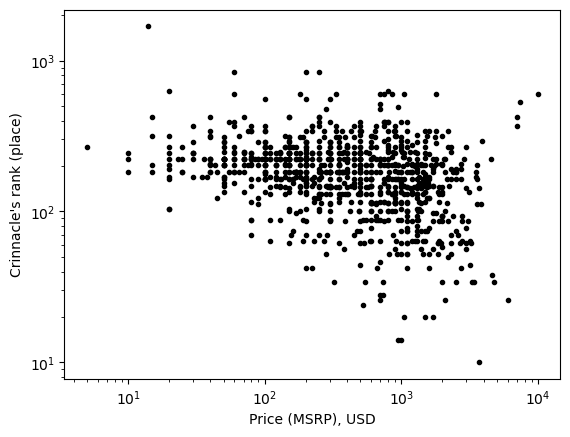

In [2]:
import pylab as plt
import numpy as np

# overall ranking vs price
plt.loglog(*[pd.to_numeric(x,errors='coerce') for x in (table['Price (MSRP)'],table['Ranksort'])],'k.')
plt.xlabel('Price (MSRP), USD')
plt.ylabel("Crinnacle's rank (place)")

It makes also sens to convert grades to numerical values:

In [3]:
grade_mapping = {k:10.0*v/17.0 for v,k in zip(np.arange(len(table['Technical Grade'].unique()[::-1])),table['Technical Grade'].unique()[::-1])}
table['technical_numeric'] = table['Technical Grade'].map(grade_mapping)
table['tonal_numeric'] = table['Tone Grade'].map(grade_mapping)

Text(0, 0.5, 'Technical gdade')

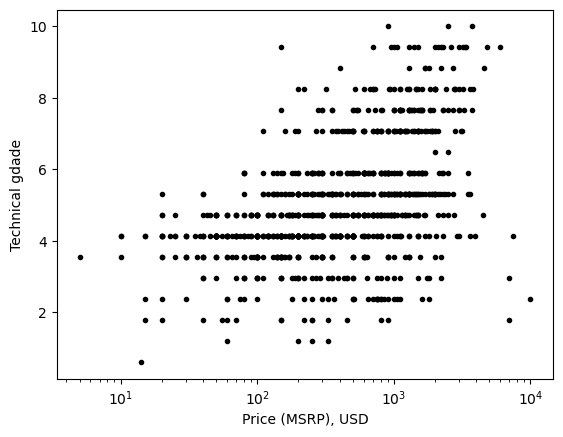

In [4]:
# technical grade vs price
plt.semilogx(pd.to_numeric(table['Price (MSRP)'],errors='coerce'),table['technical_numeric'],'k.')
plt.xlabel('Price (MSRP), USD')
plt.ylabel('Technical gdade')

Text(0, 0.5, 'Tonal grade')

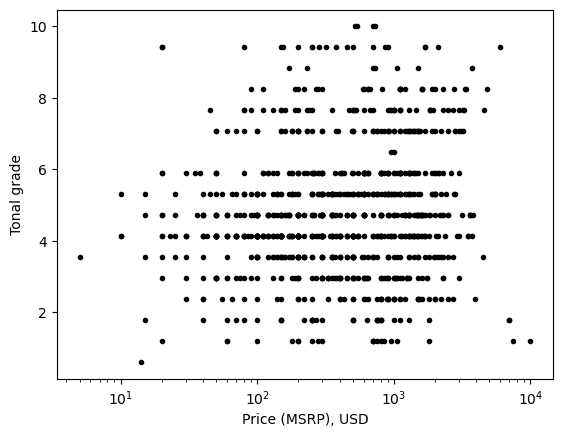

In [5]:
# tone grade vs price
grade_mapping = {k:10.0*v/17.0 for v,k in zip(np.arange(len(table['Tone Grade'].unique()[::-1])),table['Tone Grade'].unique()[::-1])}
plt.semilogx(pd.to_numeric(table['Price (MSRP)'],errors='coerce'),table['tonal_numeric'],'k.')
plt.xlabel('Price (MSRP), USD')
plt.ylabel('Tonal grade')

From the above one can deduce that there's some correlation between price and technical grade as one could hope to expect, but other correlations are less evident, i.e. dependencies are hidden somewhere. Where, shall probably be deducable from frequency response graphs. Those are available to Crin's parteon subscribers in digital form, however, not so much for general public. Here we have, however, plots provided by AutoEQ, which can be digitized. I copied those for convinience here:

In [34]:
import pandas as pd
import requests
import urllib, os
from bs4 import BeautifulSoup

# Function to fetch and parse an HTML page
def fetch_and_parse_html(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise ValueError(f"Failed to retrieve the page. Status code: {response.status_code}")
    return BeautifulSoup(response.content, 'html.parser')

# Function to fetch and parse the HTML page, then find all links
# Function to fetch and parse the HTML page, then find all links
def find_all_links(url):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")
        return []
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all <a> tags (which define hyperlinks)
    a_tags = soup.find_all('a')
    
    # Extract the href attribute from each <a> tag if it points to a jpg
    links = [a.get('href') for a in a_tags if a.get('href')]
    return [x for x in links if x.find('.jpg')>0]
    
# Function to extract tables and retain links
def extract_table_with_links(soup, table_index=0):
    # Find all tables in the HTML
    tables = soup.find_all('table')
    if not tables:
        raise ValueError("No tables found in the HTML page.")
    
    # Select the table by index
    table = tables[table_index]
    
    # Create an empty list to hold rows
    rows = []
    
    # Iterate through table rows
    for tr in table.find_all('tr'):
        row = []
        for td in tr.find_all(['td', 'th']):
            cell_content = td.get_text(strip=True)
            link = td.find('a', href=True)
            if link:
                href = link['href']
                if href.find('crinacle.com/graphs/iems/')>0:
                    sublinks = find_all_links(href)
                    if len(sublinks) >= 1:
                        #print(f"downloading {sublinks[0]}")
                        fn = f"imgs/{sublinks[0].split('/')[-1]}"
                        if not os.path.exists(fn):
                            urllib.request.urlretrieve(sublinks[0],fn)
                        cell_content = f'{cell_content} ({fn})'
            row.append(cell_content)
        rows.append(row)
    
    # Create a DataFrame from the extracted rows
    df = pd.DataFrame(rows)
    return df

# Example usage
url = 'https://crinacle.com/rankings/iems/'  # Replace with the URL containing the HTML table
soup = fetch_and_parse_html(url)
df = extract_table_with_links(soup)

downloading https://crinacle.com/wp-content/uploads/2021/08/Annihilator-2021.jpg
downloading https://crinacle.com/wp-content/uploads/2021/11/Monarch-Mk2.jpg
downloading https://crinacle.com/wp-content/uploads/2022/02/V16-Divinity.jpg
downloading https://crinacle.com/wp-content/uploads/2021/08/Traillii.jpg
downloading https://crinacle.com/wp-content/uploads/2021/05/Violet.jpg
downloading https://crinacle.com/wp-content/uploads/2021/04/Odin-EE.jpg
downloading https://crinacle.com/wp-content/uploads/2021/08/X.jpg
downloading https://crinacle.com/wp-content/uploads/2022/10/Talos-BA-off.jpg
downloading https://crinacle.com/wp-content/uploads/2021/08/Helios-Symphonium.jpg
downloading https://crinacle.com/wp-content/uploads/2022/06/Diva-Min-bass.jpg
downloading https://crinacle.com/wp-content/uploads/2021/05/V14-0000.jpg
downloading https://crinacle.com/wp-content/uploads/2021/05/Orchestra.jpg
downloading https://crinacle.com/wp-content/uploads/2021/05/FW10000.jpg
downloading https://crinacle

In [36]:
# Set the first row as the column names
df.columns = df.iloc[0]

# Drop the first row as it is now the header
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)
df

,Rank,Value Rating,Model,Price (MSRP),Signature,Comments,Tone Grade,Technical Grade,Setup,Status,Ranksort,Tonesort,Techsort,Pricesort
0,S-,★,Elysian Annihilator (2021) (Annihilator-2021.jpg),3700,U-shaped,,S-,S,2EST 4BA 1DD,Zeppelin & Co demo unit,10,7,3,3700
1,S-,★★,"Hidition Viento(B-mode, custom)",950,Variable,Best-in-class tuning and tonal balance with ne...,S+,A+,4BA,Zeppelin & Co demo unit,14,1,13,950
2,S-,★★,ThieAudio Monarch Mk2 (Monarch-Mk2.jpg),1000,Neutral with bass boost,,S+,A+,2EST 6BA 1DD,Available for demo atThe Hangout,14,1,13,1000
3,A+,★,Hidition NT6,1050,Neutral,"If Etymotic made a multi-BA IEM, this would be...",S-,A+,6BA,Null Audio demo unit,20,7,13,1050
4,A+,★,ThieAudio V16 Divinity (V16-Divinity.jpg),1500,Neutral with bass boost,,S-,A+,16BA,Available for demo atThe Hangout,20,7,13,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,F,,VE Monk IE Biggie,Discont.,Dark,Absolute mud and congestion. Could work as a s...,F,E,DD,Third party unit,1266,844,422,99999
1067,F,,Oppo MH130,14,Complete failure,The horribleness of this can only be experienc...,F,F,DD,Third party unit,1688,844,844,14
1068,F,,Delta Air complimentary earphones,0,Complete failure,It's a telephone in IEM form. It is physically...,F,F,DD,Third party unit,1688,844,844,0
1069,F,,SIA complimentary earphones,0,Dark,Its full potential can only be unleashed by an...,F,F,DD,Personal unit,1688,844,844,0


In [37]:
grade_mapping = {k:10.0*v/17.0 for v,k in zip(np.arange(len(table['Technical Grade'].unique()[::-1])),table['Technical Grade'].unique()[::-1])}
df['technical_numeric'] = df['Technical Grade'].map(grade_mapping)
df['tonal_numeric'] = df['Tone Grade'].map(grade_mapping)

/var/folders/l9/yhh7ptgx6dqb97khkd08bkmw0000gn/T/ipykernel_83520/2768627895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['technical_numeric'] = df['Technical Grade'].map(grade_mapping)
/var/folders/l9/yhh7ptgx6dqb97khkd08bkmw0000gn/T/ipykernel_83520/2768627895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tonal_numeric'] = df['Tone Grade'].map(grade_mapping)


In [43]:
df = df[df['Model'].str.contains('.jpg')]
df.reset_index(drop=True, inplace=True)
df.to_json('rating_table.json') # save checkpoint

In [359]:
df = pd.read_json('rating_table.json')
df

,Rank,Value Rating,Model,Price (MSRP),Signature,Comments,Tone Grade,Technical Grade,Setup,Status,Ranksort,Tonesort,Techsort,Pricesort,technical_numeric,tonal_numeric
0,S-,★,Elysian Annihilator (2021) (Annihilator-2021.jpg),3700,U-shaped,,S-,S,2EST 4BA 1DD,Zeppelin & Co demo unit,10,7,3,3700,10.000000,8.823529
1,S-,★★,ThieAudio Monarch Mk2 (Monarch-Mk2.jpg),1000,Neutral with bass boost,,S+,A+,2EST 6BA 1DD,Available for demo atThe Hangout,14,1,13,1000,9.411765,6.470588
2,A+,★,ThieAudio V16 Divinity (V16-Divinity.jpg),1500,Neutral with bass boost,,S-,A+,16BA,Available for demo atThe Hangout,20,7,13,1500,9.411765,8.823529
3,A+,,Oriolus Traillii (Traillii.jpg),6000,Neutral with bass boost,,A+,A+,4EST 8BA,Zeppelin & Co demo unit,26,13,13,6000,9.411765,9.411765
4,A,,Hidition Violet (Violet.jpg),3300,Neutral with bass boost,"Strong sub-bass presence, slightly cut-back up...",A,A+,11BA,Zeppelin & Co demo unit,34,21,13,3300,9.411765,8.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,E,,Final Audio Adagio 3 (Adagio-3.jpg),60,V-shaped,A case study on how NOT to do a V-shape.,E,D,DD,Jaben SG demo unit,605,422,183,60,2.352941,1.176471
495,E,,Shozy Ceres (Ceres.jpg),180,Warm,,E,D,1BA 1DD,Available for demo atThe Hangout,605,422,183,180,2.352941,1.176471
496,E,,Astrotec Volans (Volans.jpg),330,Warm,"Mediocre tuning, virtually zero technicalities...",D,E,DD,Review loaner,605,183,422,330,1.176471,2.352941
497,E,,JH Audio Diana (Diana.jpg),700,Dark,Mushy transients and the detailing capability ...,E,D,3BA,ConnectIT demo unit,605,422,183,700,2.352941,1.176471


let's also add filename explicitly as a column

In [360]:
df['filename'] = 'imgs/' + df['Model'].str.extract(r'\(([a-zA-Z].*jpg)\)')

The plot looks i.e. like this. The axes are fixed in dimensions but size of images changes depending on when they were produced. We need i.e. to find the bounding box locations to establish pixel/physical scales

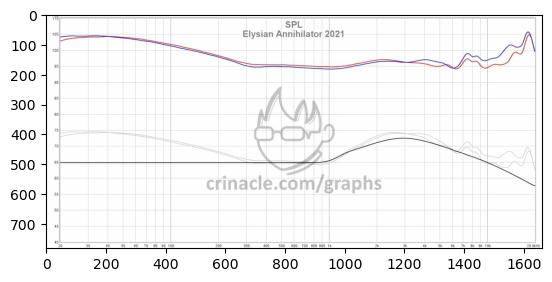

In [361]:
import pylab as plt
im = plt.imread(df['filename'][0])
plt.imshow(im)

The bounding box and red/green lines can be found fairly easy using some simple channel masking. Then loop over files to fill response vector in the dataframe

In [362]:
%%capture
import scipy.interpolate
def digitize(im, plot=False):
    # extract red/blue lines
    b = (im[:,:,0]<100)*(im[:,:,2]>100)
    r = (im[:,:,2]<100)*(im[:,:,0]>100)
    # create mask image containing only black lines
    maskim = ((np.sum(im,-1)<700)*((r+b)==0))
    # find maximal values defining bounding box
    minmax = lambda x: (x.min(),x.max())
    x0,x1 = minmax(np.where(np.sum(maskim,0)>400)[0])
    y0,y1 = minmax(np.where(np.sum(maskim,1)>400)[0])
    # define corresponding scales, log for frequency
    frange = np.log10(20000)-np.log10(20)
    freq = lambda xpix: 10**(((xpix-x0)/(x1-x0))*frange+np.log10(20))
    # and linear for DB:
    db = lambda ypix: np.polyval(np.polyfit([y0,y1],[110,40],1),ypix)
    fbins = np.logspace(np.log10(30),np.log10(19500),256) # to avoid nans at the ends, measurements not reliable here anyway
    y,x = np.where(r)
    left = scipy.interpolate.interp1d(freq(x),db(y),bounds_error=False,)(fbins)
    y,x = np.where(b)
    right = scipy.interpolate.interp1d(freq(x),db(y),bounds_error=False,)(fbins)
    resp = np.nanmean((left,right),0)
    return fbins,resp

bad = []

df['response'] = None

for i in range(len(df['filename'])):
    try:
        f,r = digitize(plt.imread(df['filename'][i]))
        df['response'][i] = r
    except:
        df['response'][i] = np.zeros(256)
        bad.append(df['filename'][i])

Now plot couple of examples, just to check: 

[[<matplotlib.lines.Line2D at 0x322a6f8f0>],

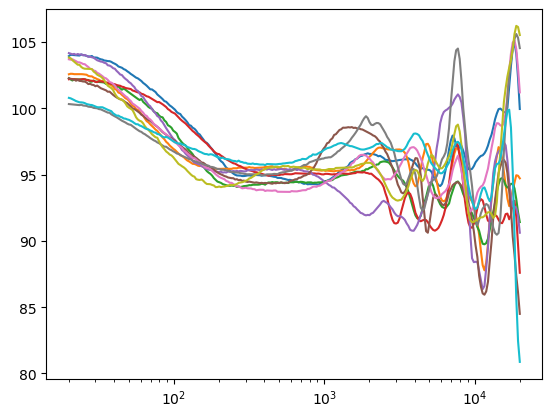

In [363]:
[plt.semilogx(np.logspace(np.log10(20),np.log10(20000),256),df['response'][i]) for i in range(10)]


Some files were not fetched, so select only columns where response is not zero:

In [364]:
df = df[df['response'].apply(np.nansum)!=0]

Another thing which might be interested in is the technology used in given headphone. Crinacle has categories BA, DD, EST, Planar, Piezo, and quotes number for each, it makes sense, i.e. to add 5 columns containing number of drivers for each technology:

In [365]:
import re
def parse_setup(x):
    tech = ['BA','DD','EST','Planar','Piezo']
    setup = [len(re.findall(fr'(\d*){y}',x))>0 and (len(re.findall(fr'(\d*){y}',x)[0]) and int(re.findall(fr'(\d*){y}',x)[0]) or 1) or 0 for y in tech]
    setup+=[sum(setup)]
    return np.array(setup)
df['Setup_vec'] = df['Setup'].apply(parse_setup)

/var/folders/l9/yhh7ptgx6dqb97khkd08bkmw0000gn/T/ipykernel_83520/865841761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Setup_vec'] = df['Setup'].apply(parse_setup)


In [366]:
df['Setup_vec']

0        [4, 1, 2, 0, 0, 7]
1        [6, 1, 2, 0, 0, 9]
2      [16, 0, 0, 0, 0, 16]
3       [8, 0, 4, 0, 0, 12]
4      [11, 0, 0, 0, 0, 11]
               ...         
494      [0, 1, 0, 0, 0, 1]
495      [1, 1, 0, 0, 0, 2]
496      [0, 1, 0, 0, 0, 1]
497      [3, 0, 0, 0, 0, 3]
498      [0, 2, 0, 0, 0, 2]
Name: Setup_vec, Length: 487, dtype: object

In [367]:
df

,Rank,Value Rating,Model,Price (MSRP),Signature,Comments,Tone Grade,Technical Grade,Setup,Status,Ranksort,Tonesort,Techsort,Pricesort,technical_numeric,tonal_numeric,filename,response,Setup_vec
0,S-,★,Elysian Annihilator (2021) (Annihilator-2021.jpg),3700,U-shaped,,S-,S,2EST 4BA 1DD,Zeppelin & Co demo unit,10,7,3,3700,10.000000,8.823529,imgs/Annihilator-2021.jpg,"[103.93892568548307, 104.03593809189337, 104.0...","[4, 1, 2, 0, 0, 7]"
1,S-,★★,ThieAudio Monarch Mk2 (Monarch-Mk2.jpg),1000,Neutral with bass boost,,S+,A+,2EST 6BA 1DD,Available for demo atThe Hangout,14,1,13,1000,9.411765,6.470588,imgs/Monarch-Mk2.jpg,"[102.56565240412749, 102.60368068199725, 102.5...","[6, 1, 2, 0, 0, 9]"
2,A+,★,ThieAudio V16 Divinity (V16-Divinity.jpg),1500,Neutral with bass boost,,S-,A+,16BA,Available for demo atThe Hangout,20,7,13,1500,9.411765,8.823529,imgs/V16-Divinity.jpg,"[102.27047146401989, 102.17383739271024, 102.0...","[16, 0, 0, 0, 0, 16]"
3,A+,,Oriolus Traillii (Traillii.jpg),6000,Neutral with bass boost,,A+,A+,4EST 8BA,Zeppelin & Co demo unit,26,13,13,6000,9.411765,9.411765,imgs/Traillii.jpg,"[102.19089990174211, 102.21937373860374, 102.2...","[8, 0, 4, 0, 0, 12]"
4,A,,Hidition Violet (Violet.jpg),3300,Neutral with bass boost,"Strong sub-bass presence, slightly cut-back up...",A,A+,11BA,Zeppelin & Co demo unit,34,21,13,3300,9.411765,8.235294,imgs/Violet.jpg,"[104.16169129530911, 104.1181744592963, 104.07...","[11, 0, 0, 0, 0, 11]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,E,,Final Audio Adagio 3 (Adagio-3.jpg),60,V-shaped,A case study on how NOT to do a V-shape.,E,D,DD,Jaben SG demo unit,605,422,183,60,2.352941,1.176471,imgs/Adagio-3.jpg,"[102.76832903198904, 102.80861686482092, 102.8...","[0, 1, 0, 0, 0, 1]"
495,E,,Shozy Ceres (Ceres.jpg),180,Warm,,E,D,1BA 1DD,Available for demo atThe Hangout,605,422,183,180,2.352941,1.176471,imgs/Ceres.jpg,"[101.65071904371881, 101.77563964024083, 101.8...","[1, 1, 0, 0, 0, 2]"
496,E,,Astrotec Volans (Volans.jpg),330,Warm,"Mediocre tuning, virtually zero technicalities...",D,E,DD,Review loaner,605,183,422,330,1.176471,2.352941,imgs/Volans.jpg,"[101.60071568555303, 101.53541434586046, 101.5...","[0, 1, 0, 0, 0, 1]"
497,E,,JH Audio Diana (Diana.jpg),700,Dark,Mushy transients and the detailing capability ...,E,D,3BA,ConnectIT demo unit,605,422,183,700,2.352941,1.176471,imgs/Diana.jpg,"[101.20566630762585, 101.20569239329917, 101.2...","[3, 0, 0, 0, 0, 3]"


This allows to take setup into consideration, i.e. we can check whether the technicalities improve when number of drivers increases:

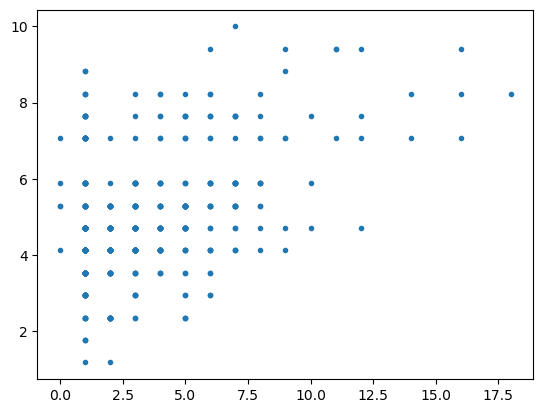

In [370]:
plt.plot(df['Setup_vec'].apply(lambda x:x[-1]),df['technical_numeric'],'.')

It is also interesting to see if the tonal score actually correlates with the response. That could i.e. be useful to determine whether crin would like give IEM based on measurements alone (which he argues definitively can be done, i.e. you can see how headphone will sound from the graph). Let's test it:

In [475]:
cosine = lambda v1,v2: np.dot(v1, v2)/np.linalg.norm(v1)/np.linalg.norm(v2)
euclid = lambda v1,v2: np.sqrt(np.sum((v1/np.linalg.norm(v1) - v2/np.linalg.norm(v2)) ** 2))

(array([[1.        , 0.40117485],
        [0.40117485, 1.        ]]),
 array([[ 1.        , -0.45981914],
        [-0.45981914,  1.        ]]))

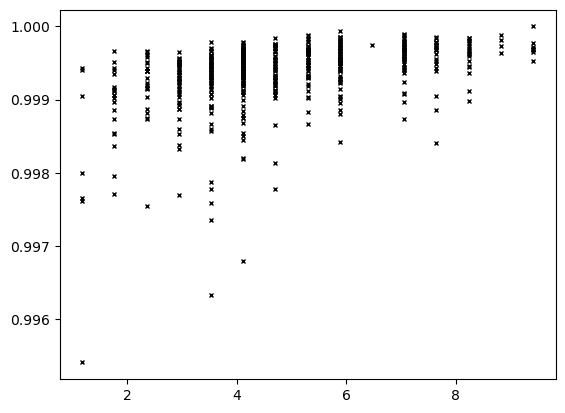

In [476]:
ts,cs = df['tonal_numeric'],df['response'].apply(lambda x: cosine(df['response'][np.argmax(df['tonal_numeric'])],x))
ts,eu = df['tonal_numeric'],df['response'].apply(lambda x: euclid(df['response'][np.argmax(df['tonal_numeric'])],x))
plt.plot(ts,cs,'kx',ms=3)
np.corrcoef(ts[abs(ts*cs)>=0],cs[abs(ts*cs)>=0]),np.corrcoef(ts[abs(ts*eu)>=0],eu[abs(ts*eu)>=0])


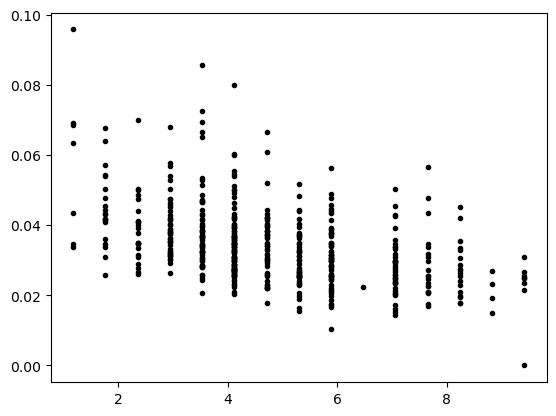

In [477]:
plt.plot(ts,eu,'k.')

there is some mild correlation, i.e. IEMs receiving similar grade also similary different from the perfect curve. That is, tonal preference is definitively affected by shape of the tonal curve, but of course tonal grade is just a subjective grade done with different tracks at different point in time, so correlation is not very tight. Nevertheless, we can try to work with it, i.e. try to come up with some extra features/ML methods to make the correlation tighter and prediction of the tonal grade more accurate. Here I'd like to point out that although tonal grade is actually a descrete set of categories in original dataset, it's in fact a continous variable, so it makes sense to treat this problem as regression rather than classification. Another thing is that we are actually interested in overall performance, and not simply a tonal/technical grades, so we need to take also setup into the account (i.e. DD!=EST), and probably also smoothness of the curve. Here the simplest metric would be sum of derivatives, so add this to original dataset:

In [514]:
df['smoothness'] = df['response'].apply(lambda x: np.sum(np.diff(x)**2))

Note that 256 points for frequency, might actually a bit too much to parametrize the response:

64

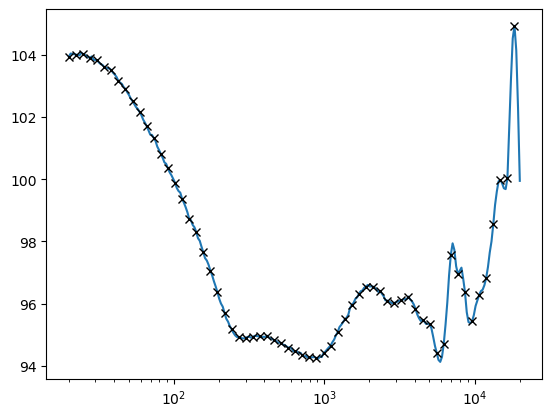

In [515]:
freq = np.logspace(np.log10(20),np.log10(20000),256)
plt.semilogx(freq,df['response'][0])
plt.plot(freq[::4],df['response'][0][::4],'kx')
len(df['response'][0][::4])

so it's safe to use 1/4 of the original data. The target variable for prediction could then be then final rating by crin, i.e. Ranksort column:

In [545]:
X = []
for i in range(len(df)):
    X.append(np.concatenate((df['response'][i][::4],[df['smoothness'][i]],df['Setup_vec'][i])))
X = np.array(X)
Y = np.array(df['Ranksort'],dtype=np.float32)

In [546]:
m = np.where(abs(X.sum(-1))>=0) # filter out NaNs
X = X[m]
Y = Y[m]

Now we can start training simple linear regression model:

In [620]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_all = scaler.transform(X)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
X_all_tensor = torch.tensor(X_all, dtype=torch.float32)

In [621]:
#start with reasonably complex linear model

class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc2 = nn.Linear(input_dim, 128)
        self.bn2 = nn.BatchNorm1d(128) # bachnorm + dropout to prevent overfitting
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(0.5)
        self.fc5 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)
        x = torch.relu(self.bn4(self.fc4(x)))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

input_dim = X_train.shape[1]
model = RegressionModel(input_dim)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-2) # regularization to prevent overfitting

In [622]:
# Training the model
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1000/10000], Loss: 16913.6035
Epoch [2000/10000], Loss: 4451.5415
Epoch [3000/10000], Loss: 2840.7419
Epoch [4000/10000], Loss: 2903.0723
Epoch [5000/10000], Loss: 2358.9368
Epoch [6000/10000], Loss: 2499.8911
Epoch [7000/10000], Loss: 2309.0234
Epoch [8000/10000], Loss: 2387.9717
Epoch [9000/10000], Loss: 1945.8628
Epoch [10000/10000], Loss: 2044.8051


In [623]:
# Evaluate the model
model.eval()
with torch.no_grad():
    train_predict = model(X_train_tensor)
    test_predict = model(X_test_tensor)

    train_loss = criterion(train_predict, y_train_tensor).item()
    test_loss = criterion(test_predict, y_test_tensor).item()

    print(f'Training Loss: {train_loss:.4f}')
    print(f'Testing Loss: {test_loss:.4f}')

Training Loss: 273.5471
Testing Loss: 4497.3247


In [624]:
model.eval()
with torch.no_grad():
    all_predict = model(X_all_tensor)

Of course, we can also use other regression methors, for instance random forest regression from sklearn:

In [627]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on training and test set
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)
y_all_pred = rf_regressor.predict(X_all)

# Calculate Mean Squared Error
train_rf_mse = mean_squared_error(y_train, y_train_pred)
test_rf_mse = mean_squared_error(y_test, y_test_pred)

print(f'RF training Loss: {train_rf_mse:.4f}')
print(f'RF testing Loss: {test_rf_mse:.4f}')

RF training Loss: 754.9378
RF testing Loss: 4364.7730


Can also plot the results for full dataset for both regressors:

Text(0, 0.5, 'Predicted rank')

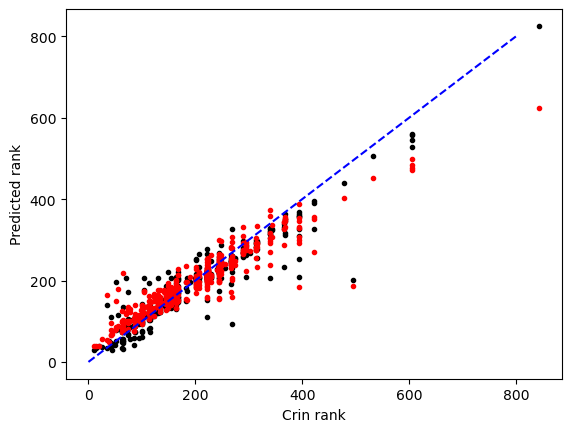

In [628]:
plt.plot(np.array(df['Ranksort'])[m], all_predict.numpy().T[0],'k.')
plt.plot(np.array(df['Ranksort'])[m], y_all_pred,'r.')
plt.plot([0,800],[0,800],'b--')
plt.xlabel('Crin rank')
plt.ylabel('Predicted rank')

We can also look at what's important for ranking. First look at the features related to frequency response:

Text(0, 0.5, 'Response')

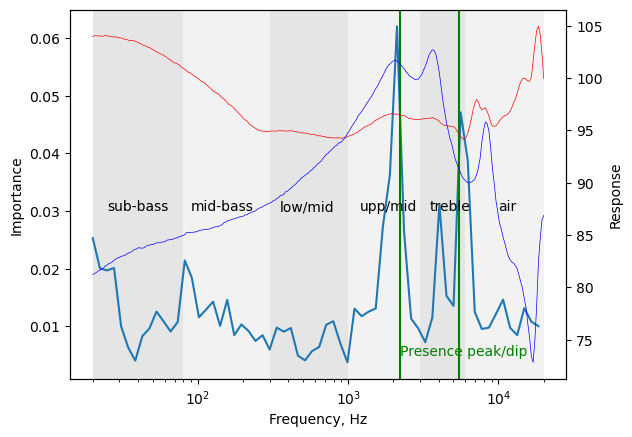

In [657]:
fshort = freq[::4]
ax = plt.subplot()
ax.semilogx(fshort, rf_regressor.feature_importances_[:len(fshort)])
ax.set_xlabel('Frequency, Hz')
ax.set_ylabel('Importance')
ax.axvspan(20,80,alpha=0.2,fc='gray')
ax.text(25,0.03,'sub-bass')
ax.axvspan(80,300,alpha=0.1,fc='gray')
ax.text(90,0.03,'mid-bass')
ax.axvspan(300,1000,alpha=0.2,fc='gray')
ax.text(350,0.03,'low/mid')
ax.axvspan(1000,3000,alpha=0.1,fc='gray')
ax.text(1200,0.03,'upp/mid')
ax.axvspan(3000,6000,alpha=0.2,fc='gray')
ax.text(3500,0.03,'treble')
ax.axvspan(6000,20000,alpha=0.1,fc='gray')
ax.text(10000,0.03,'air')
ax.axvline(2200,c='g')
ax.axvline(5500,c='g')
ax.text(2200,0.005,'Presence peak/dip',c='g')
ax1 = ax.twinx()
ax1.plot(freq,df['response'][np.argmin(df['Ranksort'])],'r-',label='best IEM',lw=0.5)
ax1.plot(freq,df['response'][np.argmax(df['Ranksort'])],'b-',label='worst IEM',lw=0.5)
ax1.set_ylabel('Response')

As one can see, two parts mostly affecting the ranking are presence peak/dip at 2/5 kHz, and two least important parts are lower midrange and "air" regions. The mid/sub-bass is important, but less so for final rating. This is actually not surprising and aligns with common knowledge also voiced by variuous reviewers: the presence peak and dip are commonly described as being responsible for detail/clarity and harschness of the sound respectively, and that's what more experienced listeners like crin will listen for. Sub-bass is apparently important as well, i.e. it probably positively affects the ranking when there is sub-bass. The bass itself (region around 80-100 Hz and up to 300 Hz) is also important, but probably the importances are probably just more spread over the range. Note that individual preferences are likely to be different than crin's but relevant ranges will likely stay the same. All in all, the conclusion is that frequency and ratio of amplitudes of presence peak/dip and overall bass quantity/quality is what one needs to look at when choosing the headphones. That's also the first thing to play with when doing equalization (i.e. try to identify where exactly presence peak/dip are for your ear, add a couple of lorenziants there plus a bass shelf at ~200Hz, and play with their relevant amplitudes)!

Now lets look at the tech part of the response:

<BarContainer object of 6 artists>

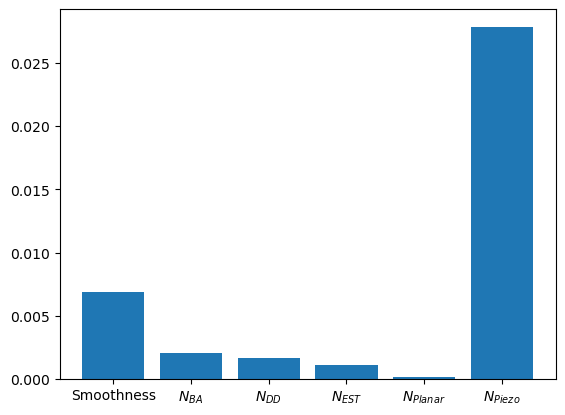

In [667]:
feature_labels = ['Smoothness']+ [f"$N_{{{x}}}$" for x in ['BA','DD','EST','Planar','Piezo']]
plt.bar(feature_labels,rf_regressor.feature_importances_[len(fshort)+1:])

Obviously, smoothness actually relates to FR itself, but also to technicalities, so I include it here. It is also the most important feature besides number of Piezo drivers, but it is overall less important than any of the frequency-related features in the previous plots. Presence of Piezo is apparently important, but, rather in a negative wah given that all IEMs with piezo are ranked rather poorly by crinnacle. The reason why Piezo is the most important among all features is probably that it has relatively narrow range coinciting with presence peak/dip area, so if anything goes wrong here, you're screwed. And apparently crinacle does not like how this area is done by Piezo drivers included in the ranking. So, the upshot is that tech is not that important for overall rating which is driven by frequency response. What one can look at is overall smoothness, and, perhaps at presence of Piezo and BA drivers in the setup. I'd avoid anything Piezo unless it fits your ears, and would look to BA for technicalities. Electrostatics can be great, but perhaps not in IEMs (crinacle ranks all EST relatively low, and I am also yet to hear nicely done EST IEM). 